In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import datetime
import calendar

In [2]:
IXIC = pd.read_csv('/Users/Lee/Desktop/research-1/IXIC.csv')
GSPC = pd.read_csv('/Users/Lee/Desktop/research-1/GSPC.csv')

IXIC.Date = pd.to_datetime(IXIC.Date)
GSPC.Date = pd.to_datetime(GSPC.Date)

IXIC['day_of_week'] = IXIC['Date'].dt.weekday_name
GSPC['day_of_week'] = GSPC['Date'].dt.weekday_name

IXIC = IXIC.drop(['High','Low','Close','Volume'],axis=1)
GSPC = GSPC.drop(['High','Low','Close','Volume'],axis=1)

IXIC['Consecutive trading day'] = IXIC['day_of_week'].shift(1) + ' to ' + IXIC['day_of_week']
GSPC['Consecutive trading day'] = GSPC['day_of_week'].shift(1) + ' to ' + GSPC['day_of_week']

IXIC['Overnight return'] = IXIC['Open'] - IXIC['Adj Close'].shift(1)
GSPC['Overnight return'] = GSPC['Open'] - GSPC['Adj Close'].shift(1)

IXIC['Log returns'] = np.log(IXIC['Open']/IXIC['Adj Close'])
GSPC['Log returns'] = np.log(GSPC['Open']/GSPC['Adj Close'])

IXIC['Overnight Volatility'] = IXIC['Log returns'].rolling(window=20).std()
GSPC['Overnight Volatility'] = GSPC['Log returns'].rolling(window=20).std()

IXIC = IXIC.dropna()
GSPC = GSPC.dropna()


### Data used: 5 years, from 10/24/2012 - 10/24/2017 

In [3]:
IXIC.head()

,Date,Open,Adj Close,day_of_week,Consecutive trading day,Overnight return,Log returns,Overnight Volatility
19,2012-11-23,2943.620117,2966.850098,Friday,Wednesday to Friday,17.070068,-0.007861,0.008937
20,2012-11-26,2961.020020,2976.780029,Monday,Friday to Monday,-5.830078,-0.005308,0.008861
21,2012-11-27,2974.560059,2967.790039,Tuesday,Monday to Tuesday,-2.219970,0.002279,0.008783
22,2012-11-28,2952.020020,2991.780029,Wednesday,Tuesday to Wednesday,-15.770019,-0.013379,0.009349
23,2012-11-29,3005.409912,3012.030029,Thursday,Wednesday to Thursday,13.629883,-0.002200,0.009339


In [4]:
GSPC.head()

,Date,Open,Adj Close,day_of_week,Consecutive trading day,Overnight return,Log returns,Overnight Volatility
19,2012-11-23,1391.030029,1409.150024,Friday,Wednesday to Friday,0.000000,-0.012942,0.009767
20,2012-11-26,1409.150024,1406.290039,Monday,Friday to Monday,0.000000,0.002032,0.009752
21,2012-11-27,1406.290039,1398.939941,Tuesday,Monday to Tuesday,0.000000,0.005240,0.009800
22,2012-11-28,1398.770020,1409.930054,Wednesday,Tuesday to Wednesday,-0.169921,-0.007947,0.009978
23,2012-11-29,1409.959961,1415.949951,Thursday,Wednesday to Thursday,0.029907,-0.004239,0.010023


### Volatility calculated as the standard deviation of logarithmic returns

### standard deviation is calculated based on previous 20 days' price 

In [5]:
def summary(df,x_lim,y_lim,target):
    # Histogram of overnight return/volatility of consecutive trading days
    fig, ax = plt.subplots(figsize=(20,20),nrows=3,ncols=2,sharex=True, sharey=True)
    axes = plt.gca()
    axes.set_ylim(y_lim)
    axes.set_xlim(x_lim)
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target],
                 kde=False, ax=ax[0][0]).set_title('Mon-Tue {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target],
                 kde=False, ax=ax[0][1]).set_title('Tue-Wed {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target],
                 kde=False, ax=ax[1][0]).set_title('Wed-Thurs {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target],
                 kde=False, ax=ax[1][1]).set_title('Thurs-Fri {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target],
                 kde=False, ax=ax[2][0]).set_title('Fri-Mon {} histogram'.format(target))

    # Stats of Consecutive Trading Days Overnight Returns/Volatility 
    means=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].mean()]

    stds=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].std()]
    
    overnight_summary = pd.DataFrame([means,stds])
    overnight_summary = overnight_summary.transpose()
    overnight_summary.columns = ['Mean of {}'.format(target), 'Standard Deviation of {}'.format(target)]
    overnight_summary.index = ['Monday to Tuesday', 'Tuesday to Wednesday', 'Wednesday to Thursday',
                                     'Thursday to Friday', 'Friday to Monday']
    return overnight_summary

## Overnight Return summary for IXIC & GSPC:

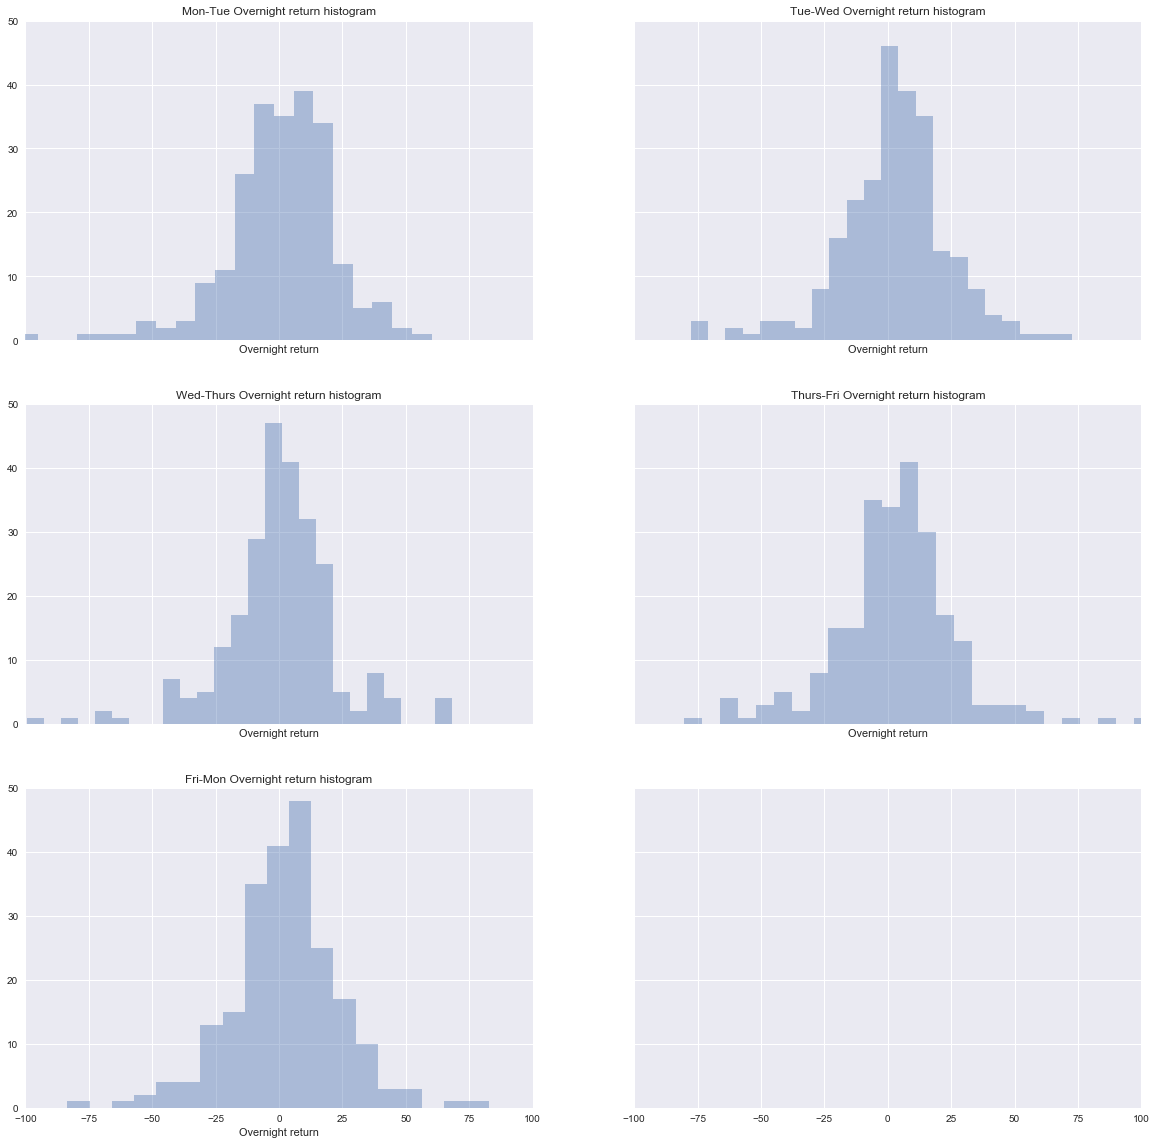

In [6]:
return_summary_IXIC = summary(IXIC,[-100,100],[0,50],'Overnight return')

**Figure 1: Consecutive Trading Days Overnight Return Histograms for IXIC **

In [7]:
return_summary_IXIC

,Mean of Overnight return,Standard Deviation of Overnight return
Monday to Tuesday,1.342121,23.804704
Tuesday to Wednesday,2.688668,22.966442
Wednesday to Thursday,0.399451,22.036809
Thursday to Friday,1.225409,28.547598
Friday to Monday,1.020524,31.987634


** Table 1: Simple Stats about difference consecutive trading days' overnight returns of IXIC** 

** From the table, the overnight return from Tuesday to Wednesday is the highest (2.689),
and from Wednesday to Thursday is the lowest (0.399).**

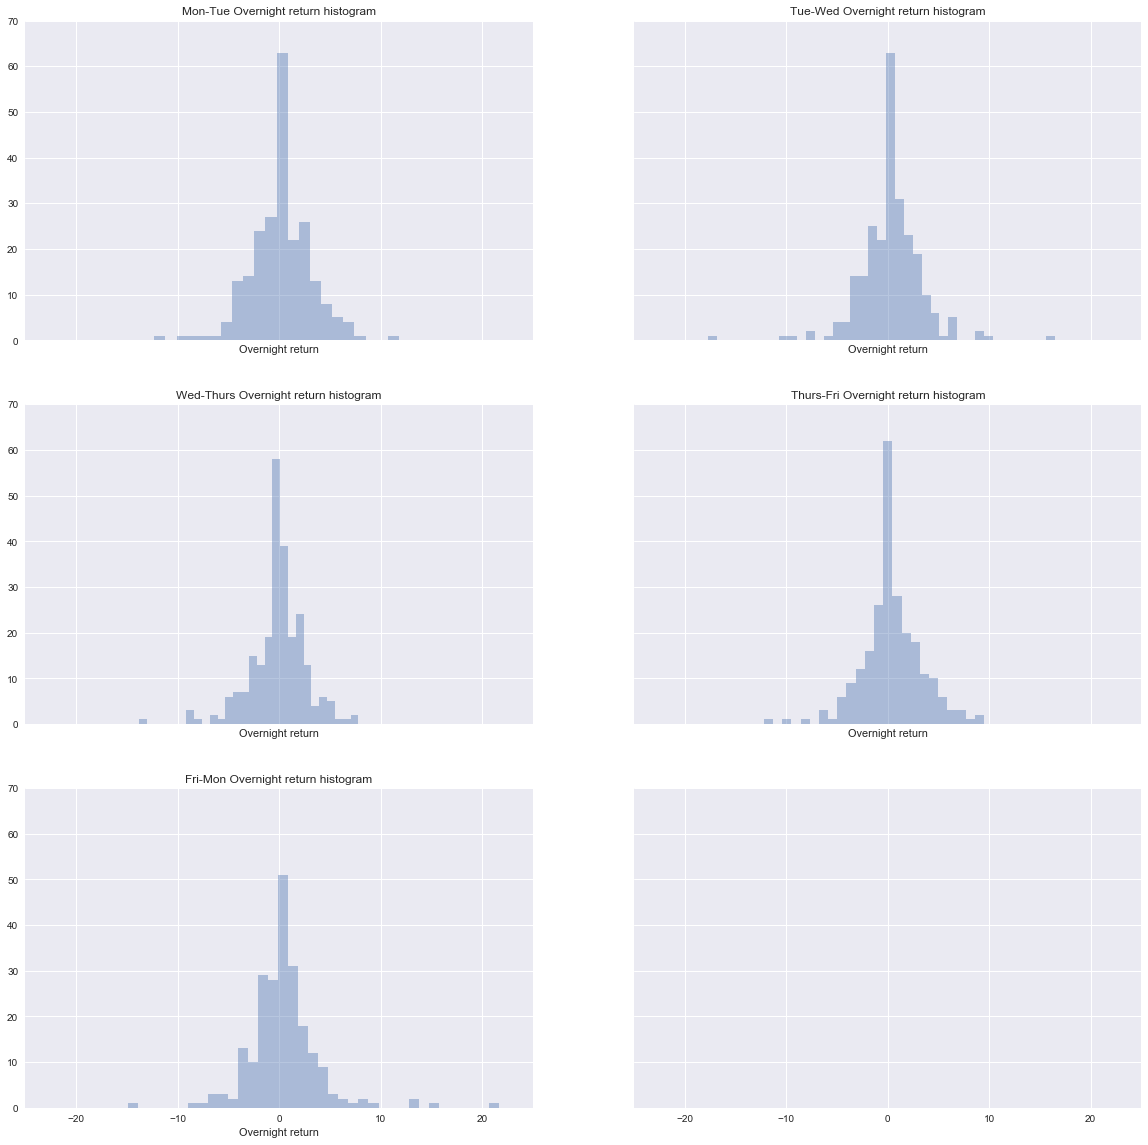

In [8]:
return_summary_GSPC = summary(GSPC,[-25,25],[0,70],'Overnight return')

**Figure 2: Consecutive Trading Days Overnight Return Histograms for GSPC **

In [9]:
return_summary_GSPC

,Mean of Overnight return,Standard Deviation of Overnight return
Monday to Tuesday,0.190261,2.982510
Tuesday to Wednesday,0.299530,3.131774
Wednesday to Thursday,-0.077015,2.753838
Thursday to Friday,0.417501,2.955745
Friday to Monday,0.447244,3.589916


** Table 2: Simple Stats about difference consecutive trading days' overnight returns of GSPC** 

** From the table, the overnight return from Friday to Monday is the highest (0.447),
and from Wednesday to Thursday is the lowest (-0.077).**



## Overnight Volatility summary for IXIC & GSPC: 

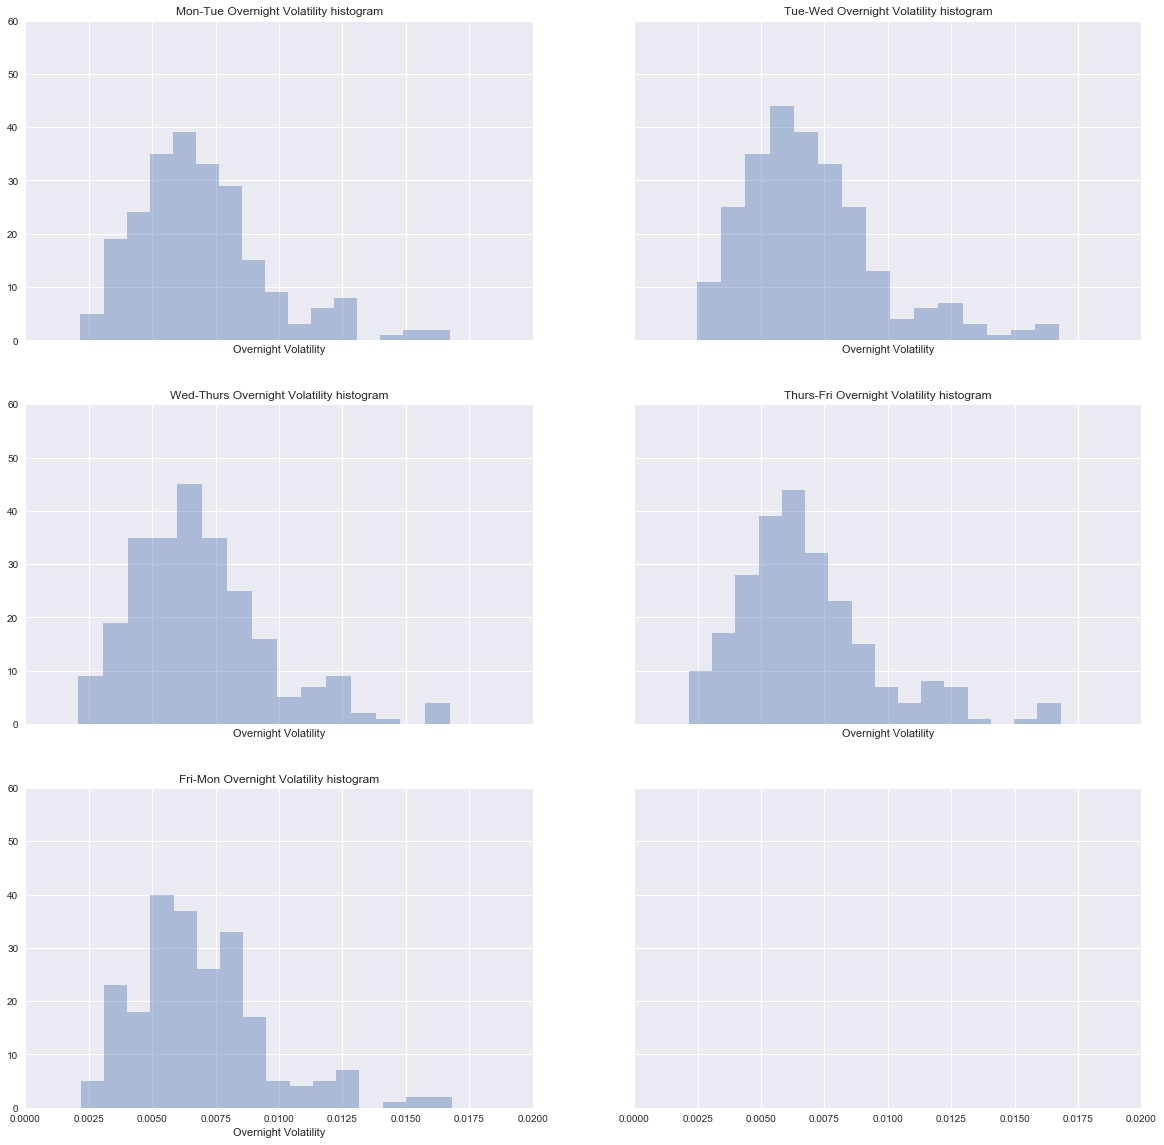

In [10]:
vol_summary_IXIC = summary(IXIC,[0,0.02],[0,60],'Overnight Volatility')

In [11]:
vol_summary_IXIC

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,0.006924,0.002591
Tuesday to Wednesday,0.006964,0.002674
Wednesday to Thursday,0.006916,0.002684
Thursday to Friday,0.006840,0.002720
Friday to Monday,0.006896,0.002595


** Figure 3 & Table 3: Overnight Volatility Histogram and Stats for IXIC **

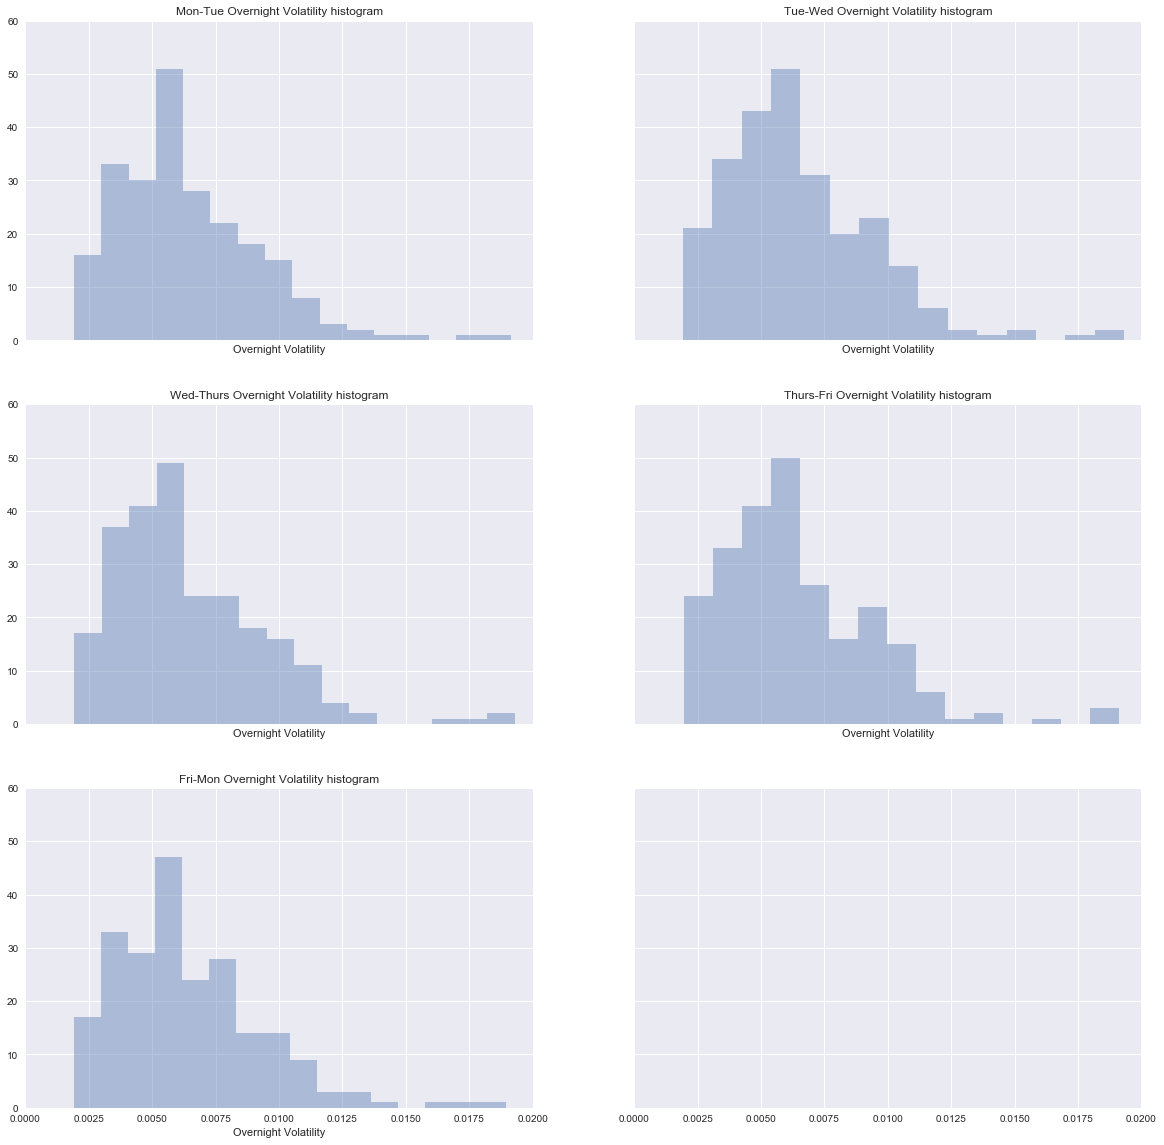

In [12]:
vol_summary_GSPC = summary(GSPC,[0,0.02],[0,60],'Overnight Volatility')

In [13]:
vol_summary_GSPC

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,0.006434,0.002803
Tuesday to Wednesday,0.006489,0.002942
Wednesday to Thursday,0.006465,0.002953
Thursday to Friday,0.006417,0.002987
Friday to Monday,0.006401,0.002838


** Figure 4 & Table 4: Overnight Volatility Histogram and Stats for GSPC **

### Didn't find significant difference between different consecutive days' overnight volatility, method to calculate 
### velatility wrong?